In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
from data import Dataset

In [3]:
dataset = Dataset('../data/signal_TDR.root')

### Energy deposits

In [4]:
dataset.get_energy_deposits(event_id=0)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

### Indices of those wires that activated

In [5]:
dataset._get_wire_ids(event_id=0)

array([ 362,  363,  558,  559,  775,  776,  984,  985, 1214, 1215, 1434,
       1435, 1436, 1677, 1678, 1679, 1910, 1911, 1912, 2166, 2167, 2168,
       2411, 2412, 2413, 2414, 2681, 2682, 2683, 2684, 2685, 2686, 2687,
       2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2429, 2430,
       2431, 2432, 2190, 2191, 2192, 2193, 1937, 1938, 1939, 1709, 1476,
       1477, 1468, 1469, 1029, 1030, 1021, 1022, 1023,  605,  606,  597,
        598,  599,  206,  207,  365,  564,  987, 1211, 1433, 1670, 1905,
       2153, 2400, 2399, 2660, 2659, 2918, 3190, 3189, 3460, 3459, 3744,
       3743, 4026, 4025, 4322, 4321, 4616, 4615, 4614,  350,  349,  542,
        541,  759,  758,  963,  962, 1192, 1191, 1407, 1406, 1649, 1648,
       1647, 1874, 1873, 1872, 2127, 2126, 2125, 2124, 2363, 2362, 2361,
       2360, 2359, 2358, 2357, 2356, 2355, 2354, 2116, 2115, 2114, 2113,
       1857,  338,  536,  535,  746,  957,  956, 1179, 1178, 1401, 1400,
       1636, 1635, 1869, 1868, 2619, 2618, 2876, 28

### Benchmarking the time needed to load all the events

In [6]:
dataset.n_events

3445

In [7]:
%%time
for i in range(dataset.n_events):
    z = dataset.get_energy_deposits(i)

CPU times: user 242 ms, sys: 4.74 ms, total: 246 ms
Wall time: 250 ms


In [2]:
import sys
sys.path.insert(0, '..')
from data import Dataset
import math
import numpy
positions_x = numpy.zeros(20)
positions_y = numpy.zeros(20)
interval = numpy.zeros(20)
dataset = Dataset('../data/signal_TDR.root')
for event in range(dataset.n_events):
    x_vals = dataset.get_measurement(event,"CdcCell_wx")
    y_vals = dataset.get_measurement(event,"CdcCell_wy")
    first_wire = 0
    for layer_id, layer_size in enumerate(dataset.n_wires_in_layers):
        if positions_x[layer_id] == 0 : 
            positions_x[layer_id] = x_vals[first_wire]
            positions_y[layer_id] = y_vals[first_wire]
            interval[layer_id] = 2*math.pi/layer_size
        first_wire += layer_size
sumsqr = 0
n=0
for x,y,r,inter,theta in zip(positions_x,positions_y,dataset.r_layers,interval,dataset.start_phi_layer):
    sumsqr += (math.sqrt(x*x)-r)**2
    r_measu = math.sqrt(x*x+y*y)
    theta_meas = math.acos(x/r_measu)
    print round(theta_meas-theta*0.001, 5), theta
    n += 1
print sumsqr

nan 0.0
0.05617 15.867
0.14354 15.4
0.09505 0.0
0.12454 14.544
0.01573 0.0
0.11911 0.0
0.10985 13.426
0.03572 0.0
0.00563 12.771
0.14472 0.0
0.03971 12.177
0.09166 0.0
0.04259 11.636
0.04779 0.0
0.05454 0.0
0.03017 0.0
0.10389 10.686
nan 0.0
nan 10.267
15769.1426713


/home/elg112/.local/lib/python2.7/site-packages/IPython/kernel/__main__.py:25: RuntimeWarning: invalid value encountered in double_scalars


In [3]:
import sys
sys.path.insert(0, '..')
from data import Dataset
import math
import numpy
import pylab
wire_pos_x = numpy.zeros(dataset.total_wires)
wire_pos_y = numpy.zeros(dataset.total_wires)
wire_pos_x[:] = 0.
wire_pos_y[:] = 0.
nhit = 0
dataset = Dataset('../data/signal_TDR.root')

for event in range(dataset.n_events):
    x_vals = dataset.get_measurement(event,"CdcCell_wx")
    y_vals = dataset.get_measurement(event,"CdcCell_wy")
    for wire in range(dataset.total_wires):
        if (x_vals[wire] != 0. and y_vals[wire] != 0. ):
            if (wire_pos_x[wire] == 0. and wire_pos_x[wire] == 0. ):
                wire_pos_x[wire] = x_vals[wire]
                wire_pos_y[wire] = y_vals[wire]
                nhit += 1
print nhit

KeyboardInterrupt: 

In [3]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '..')
from data import Dataset
import math
import numpy as np
import matplotlib.pyplot as plt
dataset = Dataset('../data/signal_TDR.root')

first_r = np.zeros(20)
first_a = np.zeros(20)
first_wire = 0

for n in r(dataset.n_wires_in_layers):
    first_r[n] = dataset.radii_table[first_wire]
    first_a[n] = dataset.angles_table[first_wire]
    first_wire += wires

ax = plt.subplot(111, polar=True)
ax.scatter(dataset.angles_table, dataset.radii_table, color='r', marker=".")
ax.scatter(first_a, first_r, color='b')
plt.show()

In [2]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '..')
from data import Dataset
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import *
dataset = Dataset('../data/signal_TDR.root')

first_a = np.zeros(3)
first_r = np.zeros(3)

neigh = find(dataset.neighbours_table[100,:])
print neigh
for n,nei in enumerate(neigh[1]):
    first_a[n] = dataset.angles_table[nei]
    first_r[n] = dataset.radii_table[nei]

ax = plt.subplot(111, polar=True)
ax.scatter(dataset.angles_table, dataset.radii_table, color='r', marker=".")
ax.scatter(first_a, first_r, color='b')
plt.show()

(array([0, 0], dtype=int32), array([199, 201], dtype=int32), array([ 1.,  1.]))


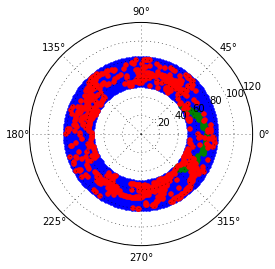

In [24]:
dataset = Dataset('../data/signal_TDR.root')

signal_tracks = np.where(dataset.get_hit_types(1) == 1)[0]
signal_a = np.zeros(len(signal_tracks) )
signal_r = np.zeros(len(signal_tracks) )

for n,sig in enumerate(signal_tracks):
    signal_a[n] = dataset.angles_table[sig]
    signal_r[n] = dataset.radii_table[sig]

back_tracks = np.where(dataset.get_hit_types(1) == 2)[0]
back_a = np.zeros(len(back_tracks) )
back_r = np.zeros(len(back_tracks) )

for n,bck in enumerate(back_tracks):
    back_a[n] = dataset.angles_table[bck]
    back_r[n] = dataset.radii_table[bck]    
    
ax = plt.subplot(111, polar=True)
ax.scatter(dataset.angles_table, dataset.radii_table, color='b', marker=".")
ax.scatter(signal_a, signal_r, color='g')
ax.scatter(back_a, back_r, color='r')

In [ ]:
figsize(16, 10).ataset/